In [1]:
!python --version

Python 3.10.12


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
palette_color = sns.color_palette('pastel')

#untuk dapat melihat seluruh kolom dan baris
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<ipython-input-2-e9a6b8f31d09>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# TITANIC - DATA VISUALIZATION

Dataset Titanic merupakan salah satu set data paling terkenal dan banyak dipelajari dalam dunia data science dan machine learning. Popularitasnya berasal dari cerita tragis tenggelamnya RMS Titanic pada perjalanan perdana tahun 1912, yang menyebabkan lebih dari 1.500 penumpang dan awak kapal meninggal. Dataset ini memberikan informasi detil tentang status kelangsungan hidup penumpang Titanic, termasuk usia, jenis kelamin, kelas tiket, tarif yang dibayar, dan banyak lagi.

source: https://www.kaggle.com/competitions/titanic/

In [33]:
df= pd.read_csv("/content/drive/MyDrive/MSIB 6 (GreatEdu)/titanic_train.csv")
print(df.shape)

(891, 12)


In [5]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S


### **Penjelasan dataset**
Setiap penumpang dalam dataset Titanic diidentifikasi dengan
 - PassengerId  
 - Survived: status kelangsungan hidupnya (1 untuk selamat, 0 untuk tidak selamat).

Informasi tambahan meliputi:
- Pclass (kelas sosial ekonomi penumpang),
- Name (nama penumpang),
- Sex (jenis kelamin),
- Age (umur),
- SibSp (jumlah saudara atau pasangan),
- Parch (jumlah orang tua atau anak),
- Ticket (nomor tiket),
- Fare (tarif perjalanan),
- Cabin (nomor kabin), dan
- Embarked (pelabuhan keberangkatan).

Tipe data:
- Numeric - Continuous : Fare, Age
- Numeric - Discrete : SibSp, Parch
- Category Ordinal : pclass (1st = Upper, 2nd = Middle, 3rd = Lower)
- Category Nominal : sex, embarked

In [6]:
#analisa deskriptif untuk tipe data numerik
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visualisasi Setiap Kolom / Univariate Analysis

0    549
1    342
Name: Survived, dtype: int64


<Axes: >

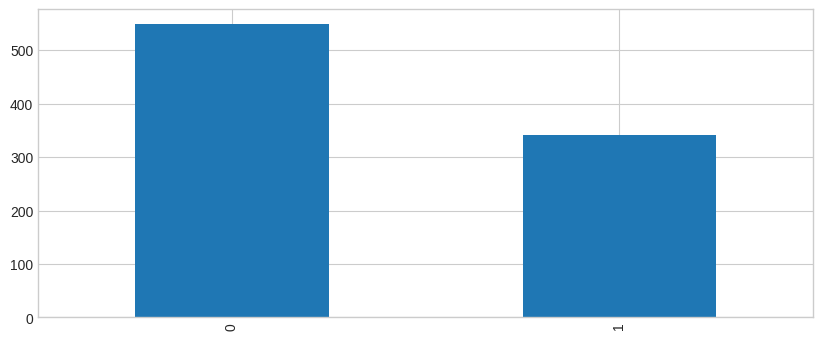

In [7]:
# perbandingan jumlah penumpang yang selamat
fig = plt.figure(figsize=(10,4))
print(df['Survived'].value_counts())
df['Survived'].value_counts().plot.bar()
#sns.countplot(y='Survived', data=df)

Kesimpulan : lebih banyak penumpang yang tidak selamat

male      577
female    314
Name: Sex, dtype: int64


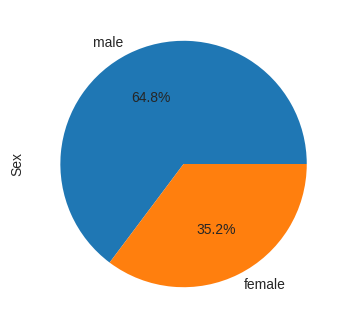

In [8]:
# perbandingan jenis kelamin penumpang
fig = plt.figure(figsize=(10,4))
#sns.countplot(y='Sex', data=df)
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%')
print(df['Sex'].value_counts())

Kesimpulan : jumlah penumpang laki-laki jauh lebih banyak dibandingkan penumpang perempuan

S    644
C    168
Q     77
Name: Embarked, dtype: int64


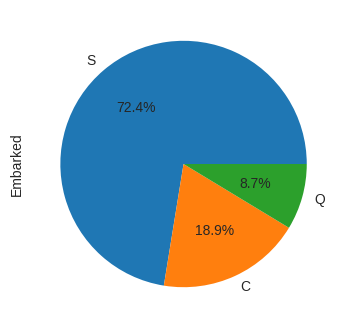

In [9]:
# perbandingan tempat keberangkatan (kota)
fig = plt.figure(figsize=(10,4))
df['Embarked'].value_counts().plot.pie(autopct='%1.1f%%')
print(df['Embarked'].value_counts())

Kesimpulan = mayoritas penumpang (72.4%) berangkat dari kota S

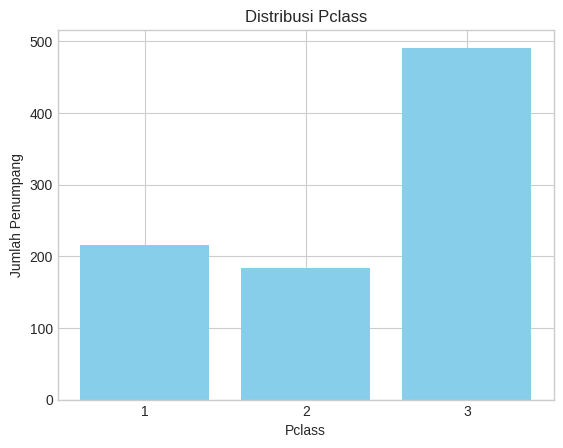

In [10]:
# Task 1 - Gambarkan Distribusi pclass, gunakan visualisasi yang cocok kemudian berikan kesimpulan

# Menghitung jumlah penumpang berdasarkan kelas pclass
pclass_distribution = df['Pclass'].value_counts()

# Membuat plot distribusi
plt.bar(pclass_distribution.index, pclass_distribution.values, color='skyblue')
plt.xlabel('Pclass')
plt.ylabel('Jumlah Penumpang')
plt.title('Distribusi Pclass')
plt.xticks(pclass_distribution.index)
plt.show()

Kesimpulan : Berdasarkan hasil di atas Pclass terkecil ada di kelas 2

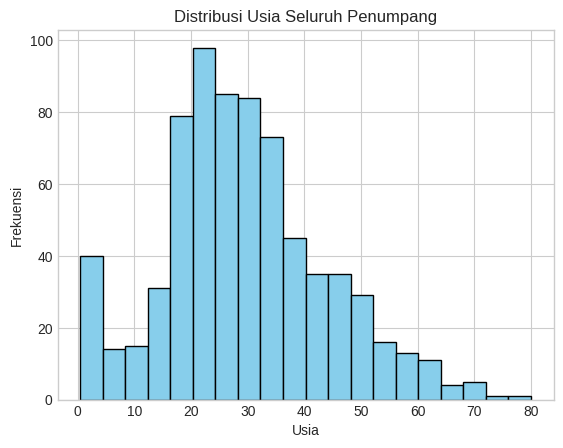

In [11]:
# Task 2 - Gambarkan Distribusi umur seluruh penumpang, gunakan visualisasi yang cocok kemudian berikan kesimpulan

# Membersihkan nilai-nilai yang hilang
df_cleaned = df.dropna(subset=['Age'])

# Plot histogram distribusi usia
plt.hist(df_cleaned['Age'], bins=20, color='skyblue', edgecolor='black')

# Memberi judul dan label sumbu
plt.title('Distribusi Usia Seluruh Penumpang')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')

# Menampilkan plot
plt.show()

Kesimpulan : Berdasarkan ouput di atas rentang umur terbanyak ada di 20 - 30

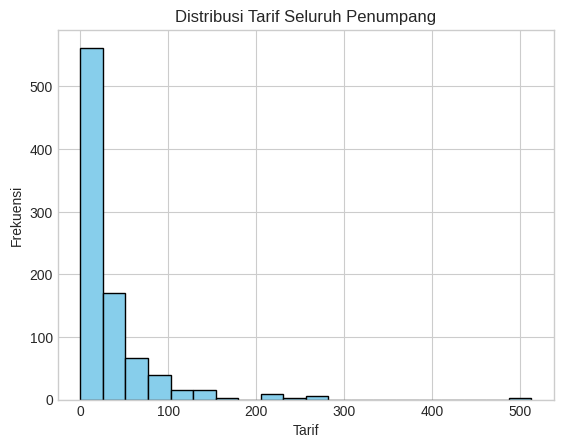

In [12]:
# Task 3 - Gambarkan Distribusi fare seluruh penumpang, gunakan visualisasi yang cocok kemudian berikan kesimpulan

# Membersihkan nilai-nilai yang hilang
df_cleaned = df.dropna(subset=['Fare'])

# Plot histogram distribusi tarif
plt.hist(df_cleaned['Fare'], bins=20, color='skyblue', edgecolor='black')

# Memberi judul dan label sumbu
plt.title('Distribusi Tarif Seluruh Penumpang')
plt.xlabel('Tarif')
plt.ylabel('Frekuensi')

# Menampilkan plot
plt.show()

Kesimpulan : terdapat data outlier yaitu di angka 500

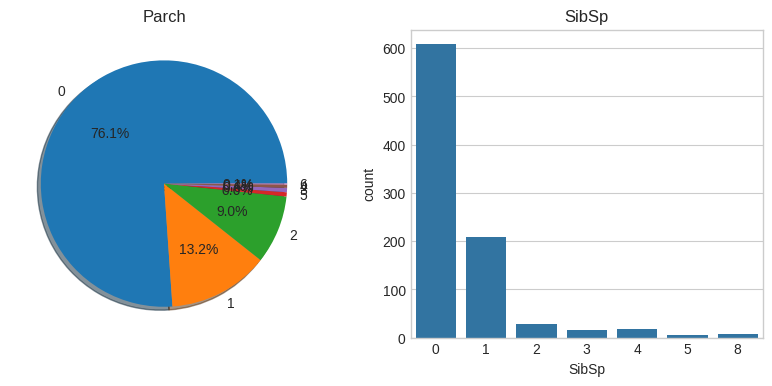

In [13]:
#persebaran Parch & SibSp
f,ax=plt.subplots(1,2,figsize=(10,4))
df['Parch'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Parch')
ax[0].set_ylabel('')
sns.countplot(x='SibSp',data=df,ax=ax[1])
ax[1].set_title('SibSp')
plt.show()

Kesimpulan : mayoritas penumpang adalah solo traveler (tidak bawa anak ataupun tidak bawa orang tua)

# Bivariate Analysis for Survived

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<ipython-input-15-7ed012f7514d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Sex'] = selected_df['Sex'].map({'male': 0, 'female': 1})


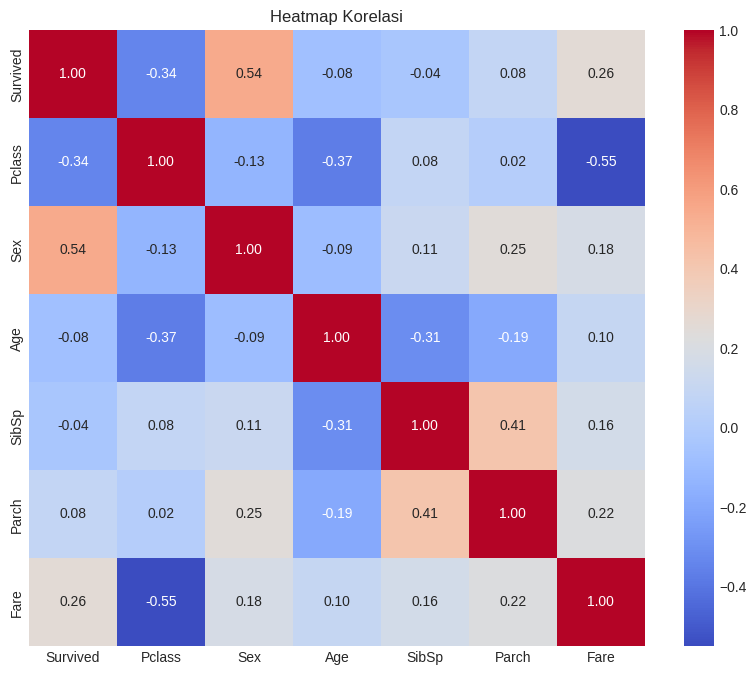

In [15]:
# Task 4 : tampilkan heatmap correlation untuk kolom 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'
# dan tuliskan kesimpulan yang menarik dari heatmap tersebut

# Pilih kolom-kolom yang akan digunakan
selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
selected_df = df[selected_columns]

# Ubah kolom 'Sex' menjadi numerik
selected_df['Sex'] = selected_df['Sex'].map({'male': 0, 'female': 1})

# Hitung korelasi antar kolom
correlation_matrix = selected_df.corr()

# Plot heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Heatmap Korelasi')
plt.show()

Kesimpulan : semakin membayar mahal Fare nya semakin tinggi juga fare nya dan jika Pclass nya turun maka survived nya juga turun

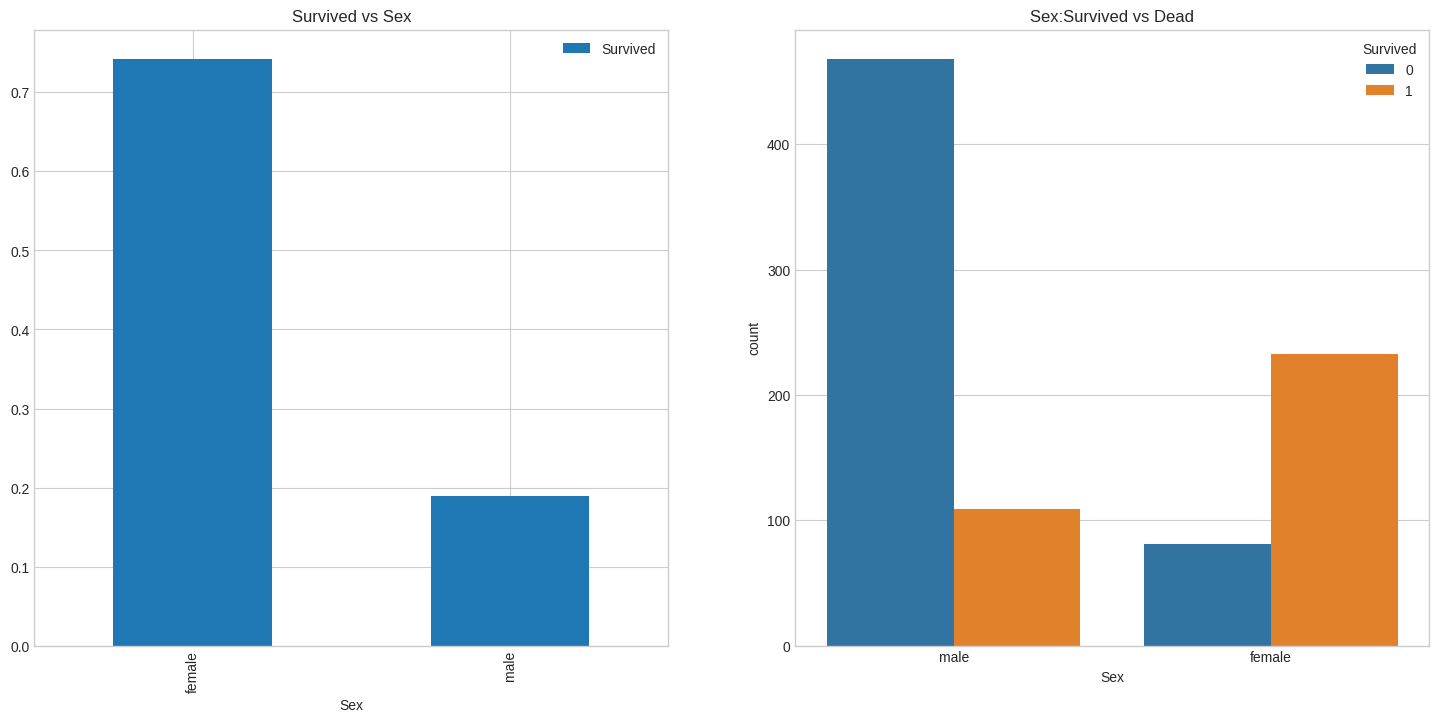

In [16]:
# Perbandingan Survived dengan Sex
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
# Perbandingan Survived dengan Dead
sns.countplot(x='Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

Kesimpulan : pada plot di atas memiliki distribusi yang berbeda antara male dan female, dimana mayoritas male tidak selamat sedangkan mayoritas female selamat

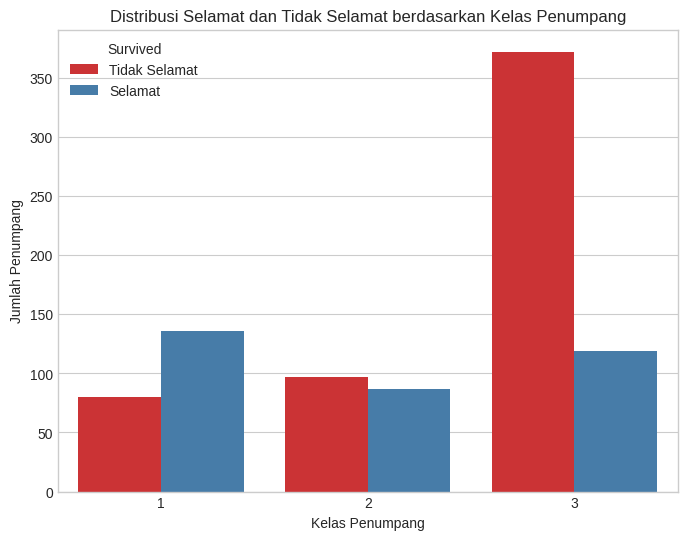

In [17]:
# Task 5 - Gambarkan Distribusi perbandingan antara Pclass dan Survived,
# gunakan visualisasi yang cocok kemudian berikan kesimpulan

# Plot distribusi perbandingan antara Pclass dan Survived
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set1')

# Memberi judul dan label sumbu
plt.title('Distribusi Selamat dan Tidak Selamat berdasarkan Kelas Penumpang')
plt.xlabel('Kelas Penumpang')
plt.ylabel('Jumlah Penumpang')

# Menampilkan plot
plt.legend(title='Survived', labels=['Tidak Selamat', 'Selamat'])
plt.show()

Kesimpulan : (Pclass) kelas yang paling banyak yang tidak selamat ada di kelas 3 dan yang paling sedikit tidak selamat ada di kelas 1

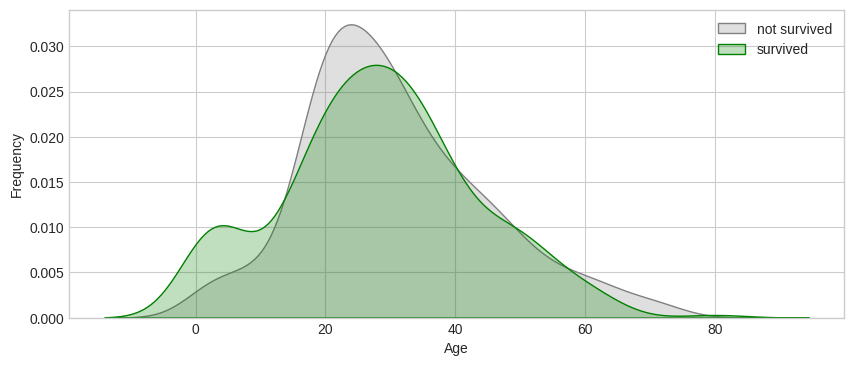

In [18]:
# Perbandingan Age dengan Survived dengan Kernel Density Plot
fig = plt.figure(figsize=(10,4),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Age'] , color='gray',fill=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Age'] , color='green',fill=True, label='survived')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.legend()

Kesimpulan : Tidak ada yang perbedaan yang terlihat plot ini, kecuali bagian paling kiri distribusinya. Ini mungkin mengisyaratkan kemungkinan bahwa anak-anak dan bayi menjadi prioritas.

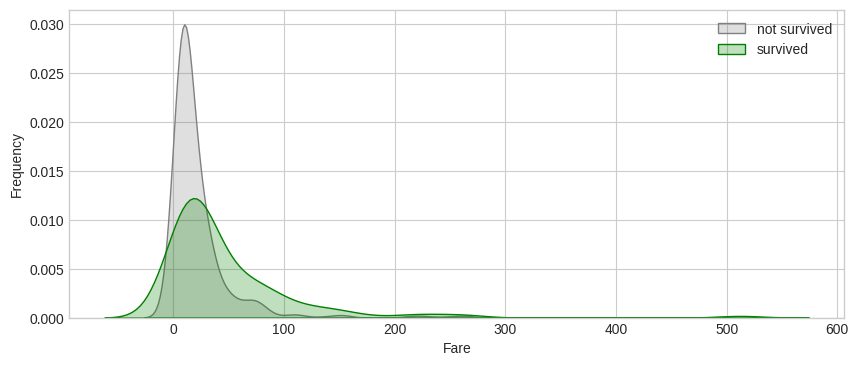

In [19]:
# Task 6 - Gambarkan Distribusi perbandingan antara Fare dan Survived,
# gunakan visualisasi yang cocok kemudian berikan kesimpulan
fig = plt.figure(figsize=(10,4),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Fare'] , color='gray',fill=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Fare'] , color='green',fill=True, label='survived')
plt.xlabel("Fare")
plt.ylabel('Frequency')
plt.legend()

Kesimpulan : Dapat kita ketahui bahwa Fare yang lebih rendah (penumpang yang membayar lebih murah) lebih banyak yang not survived (tidak selamat).

# Multivariate Analysis

<Axes: xlabel='Pclass', ylabel='Age'>

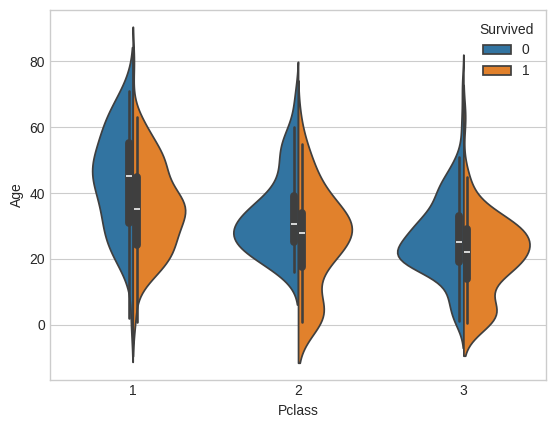

In [20]:
# Analisis Pclass, Age dan Survived
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True)

<Axes: xlabel='Sex', ylabel='Age'>

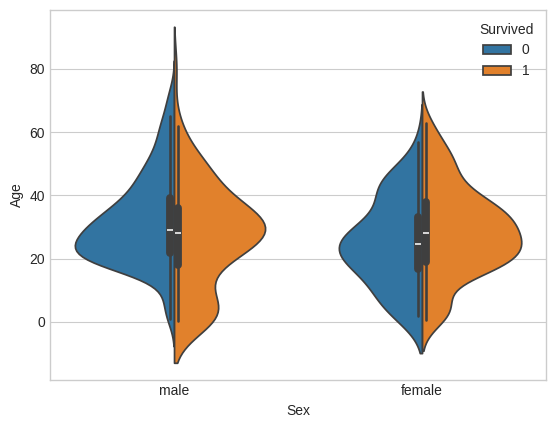

In [21]:
# Analisis Sex, Age dan Survived
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True)

In [22]:
# Task 7-10 Buatlah tambahan 4 plot analisa, Anda dibebaskan untuk membuat data visualisasi
# dengan kombinasi data yang berbeda untuk menemukan informasi menarik mengenai dataset Titanic ini
# dan berikan kesimpulan Anda terhadap analisa yang anda buat

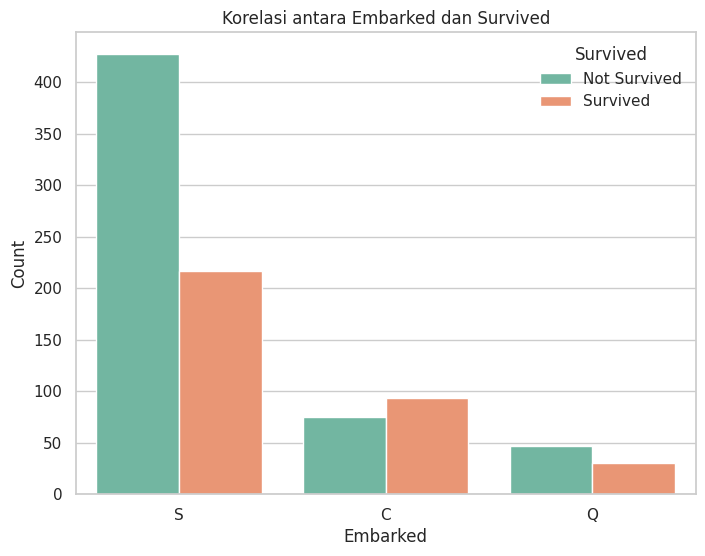

In [23]:
# Task 7 - Gambarkan corelasi penumpang berangkat (Embarked) dengan keselamatan (Survived)
# gunakan visualisasi yang cocok kemudian berikan kesimpulan

# Membuat plot korelasi
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=df, palette="Set2")
plt.title('Korelasi antara Embarked dan Survived')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

Kesimpulan : berdasarkan output di atas dapat kita ketahui bahwa jumlah penumpang terbanyak yang selamat berdasarkan jumlah perEmbarked berada di kota C'

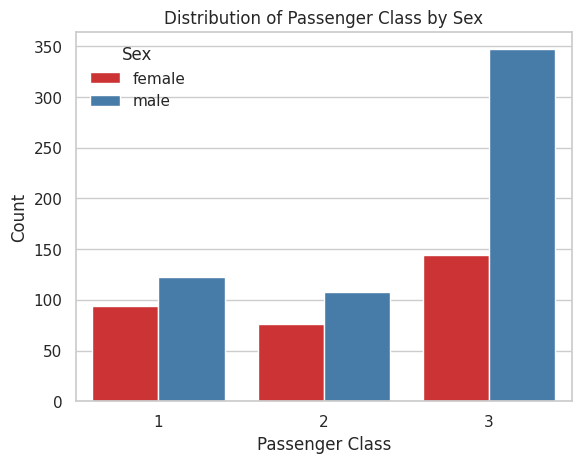

In [24]:
# Task 8 - Gambarkan Distribusi perbandingan antara Pclass dan Sex , gunakan visualisasi yang cocok kemudian berikan kesimpulan

# Membuat count plot untuk distribusi perbandingan antara Pclass dan Sex
sns.countplot(data=df, x='Pclass', hue='Sex', palette='Set1')
plt.title('Distribution of Passenger Class by Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

Kesimpulan : terdapat proporsi yang lebih besar dari penumpang Laki-Laki dibandingkan dengan kelas penumpang lainnya, dan yang paling signifikan ada di kelas 3. Ini menunjukkan adanya perbedaan dalam komposisi gender antara kelas penumpang

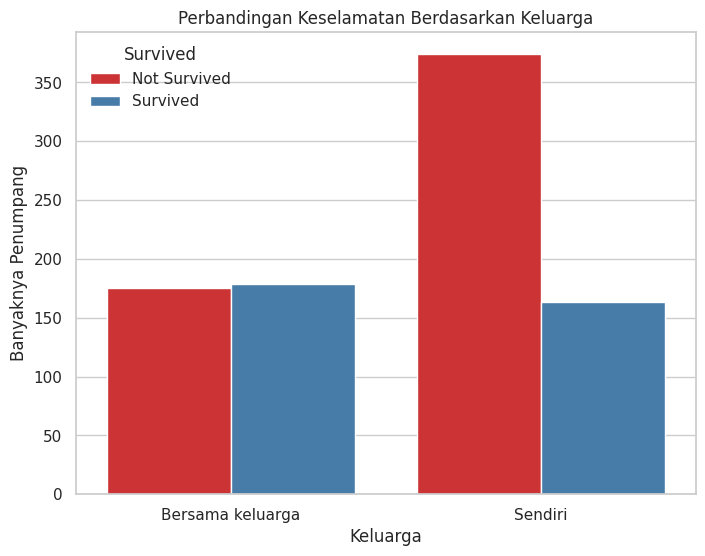

Survived            0    1
Family                    
Bersama keluarga  175  179
Sendiri           374  163


In [44]:
# Task 9 - Gambarkan Distribusi perbandingan antara SibSp dan Parch, gunakan visualisasi yang cocok kemudian berikan kesimpulan

# Menggabungkan kolom SibSp (Jumlah saudara/pasangan) dan Parch (Jumlah orang tua/anak) menjadi kolom Family
df['Family'] = df['SibSp'] + df['Parch']

# Mengubah kolom Family menjadi kategori "Alone" jika tidak ada anggota keluarga dan "With Family" jika ada anggota keluarga
df['Family'] = df['Family'].apply(lambda x: 'Sendiri' if x == 0 else 'Bersama keluarga')

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Family', hue='Survived', palette='Set1')
plt.title('Perbandingan Keselamatan Berdasarkan Keluarga')
plt.xlabel('Keluarga')
plt.ylabel('Banyaknya Penumpang')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()
jumlah = df.groupby(['Family', 'Survived']).size().unstack()
print(jumlah)

Kesimpulan : Terlihat bahwa rata-rata biaya tiket cenderung meningkat dengan naiknya kelas penumpang, yang masuk akal karena kelas penumpang yang lebih tinggi umumnya memiliki fasilitas yang lebih baik

<ipython-input-38-8a328c3ee80d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df, palette='Set3')


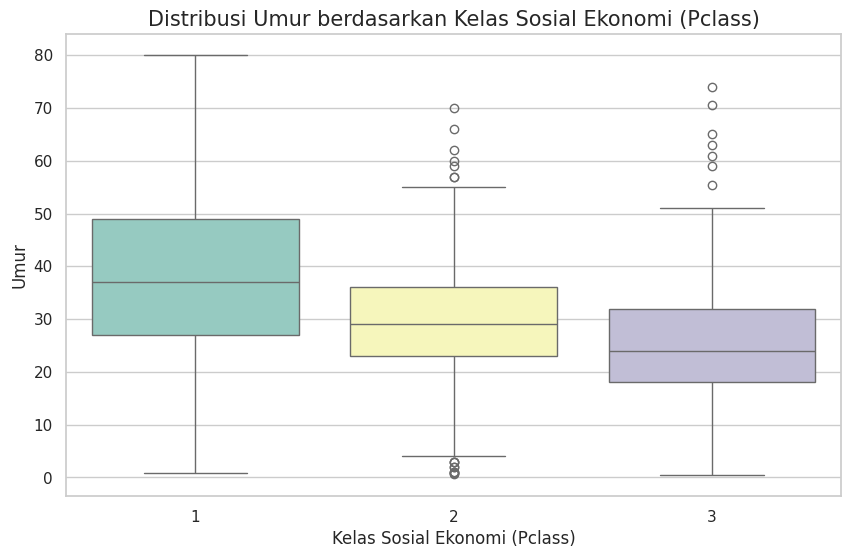

In [38]:
# Task 10 - Gambarkan Distribusi perbandingan antara Age dan Pclass, gunakan visualisasi yang cocok kemudian berikan kesimpulan

# Menggunakan seaborn style
sns.set(style="whitegrid")

# Membuat box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df, palette='Set3')
plt.title('Distribusi Umur berdasarkan Kelas Sosial Ekonomi (Pclass)', fontsize=15)
plt.xlabel('Kelas Sosial Ekonomi (Pclass)', fontsize=12)
plt.ylabel('Umur', fontsize=12)
plt.show()

Kesimpulan : terlihat bahwa penumpang kelas sosial ekonomi yang lebih tinggi (kelas 1) cenderung memiliki usia rata-rata yang lebih tua dibandingkan dengan kelas sosial ekonomi yang lebih rendah (kelas 2 dan 3) dan terdapat sejumlah besar outlier di setiap kelas, yang menunjukkan variasi usia yang signifikan di dalam setiap kelas sosial ekonomi.